# Phase 2 Milestone 1

# A. Introduction

by Handoko Pramulyo | Batch : FTDS-014

Konteks pada case ini adalah "Predict behavior to retain customers, berdasarkan beberapa feature dari para pelanggan tersebut". Kumpulan data mencakup informasi mengenai pelanggan yang pergi dalam sebulan terakhir, layanan yang telah didaftarkan oleh setiap pelanggan seperti telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, serta streaming TV dan film. Adapun selain itu informasi lainnnya adalah terkait akun pelanggan seperti sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan. Kemudian yang terkahir adalah info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan.

Source of data : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Deployment app link : https://frontend-bismillah.herokuapp.com/

Objective : `Membuat model classification dgn ANN pada dataset` **Telco Customer Churn** `, Label : Churn`

# B. Library

In [2]:
# basic Library
import pandas as pd
import numpy as np 
# Library for creating chart
import seaborn as sns
import matplotlib.pyplot as plt 
# Library from sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Library from tensorflow (creating the model for ANN)
import tensorflow as tf
from tensorflow import keras
# Library for handling imbalanced target
from imblearn.over_sampling import SMOTENC
# Library for handling outliers
from feature_engine.outliers import Winsorizer
# Library for saving & loading
import pickle # create pipeline data: preprocessor
import requests # request from URL 
import json # load file
import joblib

# Define plot style
plt.style.use('ggplot')

Pada case Machine Learning ini, library yang akan digunakan adalah scikit-learn & tensorflow (Machine Learning library in Python), library yang dedicated dibuat untuk Machine Learning & ANN. Simple and efficient tools for predictive data analysis, Accessible to everybody, and reusable in various contexts, Built on NumPy, SciPy, and matplotlib, Open source, dan sekaligus commercially usable. OK, lets proceed to the next part.

# C. Data Loading

Pada bagian ini, kita akan coba isi dengan proses penyiapan data (pd read) sebelum dilakukan eksplorasi data lebih lanjut (atau yang biasa disebut dengan EDA). Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom (opsional), melihat gambaran umum dari data, mengecek ukuran dataset, dll.

In [3]:
# Load Dataset 
data = pd.read_csv('telco_customer_churn.csv') # Read CSV file
# data = pd.read_excel('filename.xlsx', index_col=None, header=None) # # Read Excel file
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Data observasi OKE (lebih dari 50 jumlah observasi --> based on sclearn recommendation) dengan jumlah feature yang proporsional, maka yang bisa kita artikan bahwa model yang akan dibuat 'most likely' low possibility untuk overfit (due to low variance which is good. ```Additional conclusion based on least square``` Jennifer Zhao in medium.com).

In [5]:
# Duplicate Dataset
data_copy = data.copy()
label_name = 'Churn'
# Check Dataset
# looking up for missing value
# Understanding the dataset Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Dataset terdiri dari int, float dan object.** Untuk sementara, no nulled data found just yet! Let's see a little bit deeper for each unique data. Objective: mempelajari kesesuaian antara tipe data dan data yang terdapat pada kolom tersebut (menghindari data int yang tersimpan as string, vise versa, dll) 

In [6]:
print(data['gender'].unique())
print(data['Partner'].unique())
print(data['Dependents'].unique())
print(data['PhoneService'].unique())
print(data['MultipleLines'].unique())
print(data['InternetService'].unique())
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())
print(data['DeviceProtection'].unique())
print(data['TechSupport'].unique())
print(data['StreamingTV'].unique())
print(data['StreamingMovies'].unique())
print(data['Contract'].unique())
print(data['PaperlessBilling'].unique())
print(data['PaymentMethod'].unique())
print(data['TotalCharges'].unique())
print(data['Churn'].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


Berdasarkan hasil pengamatan .info, maka dapat dilihat bahwa feature Churn masih dalam bentuk categorical yes dan no. Mengingat model ANN akan digunakan pada case ini (which we expect proba for the result of prediction), oleh karena itu jenis data pada target perlu diubah menjadi numerical terlebih dahulu. Kemudian perlu dilakukan juga konversi tipe data untuk feature SeniorCitizen (int into string) & TotalCharges (string into int) 

In [7]:
# TotalCharges DType convertion, from int into string
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)
data = data.replace({'SeniorCitizen' : { '1' : 'Yes', '0' : 'No'}})

# Target DType convertion, from categorical into numerical (ANN porpose)
data['Churn'] = pd.DataFrame(pd.Categorical(data['Churn']).codes)[0]
data['Churn'] = np.asarray(data['Churn']).astype('int64').reshape((-1,1))

# TotalCharges DType convertion, from string into numerical
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].info()

# show all Nan in TotalCharges only
# data[data.isna().any(axis=1)]

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [8]:
# Check Dataset
data.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Pada data tenure, rata-rata dari para pelanggan memiliki tenure sebesar ~32 dengan maksimal diangaka 72 dan minimum 0, artinya GAP antara pelanggan dari max sd min cukup jauh. Selain itu, jika kita bandingkan antara MonthlyCharges & MonthlyCharges, maka dapat dilihat bahwa ada beberapa pelanggan yang hanya berlangganan selama satu bulan saja (nilai minimum pada MonthlyCharges & MonthlyCharges overall hampir sama).

# D. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset yang sudah kita load pada bagian pertama dengan menggunakan query, grouping, dan visualisasi sederhana (lets find out something interesting within the data). ```Lets find correlation between numerical feature before proceed even further!```

## D1. Features Analysis

### Heatmap

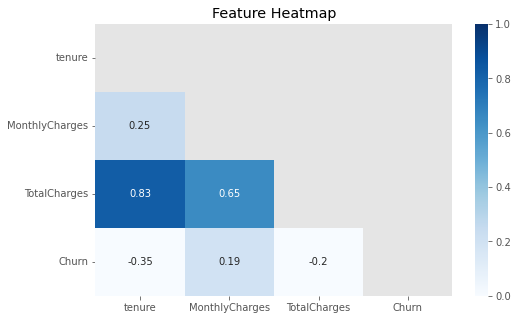

In [9]:
# Use a mask to plot only part of a matrix
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# mask=mask (put this syntax into sns.heatmap argumen)

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap="Blues", mask=mask)
plt.title('Feature Heatmap')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Tidak ada feature dengan korelasi di antara -0.1 sd 0.1, so all numerical feature will be used for now.

### Chi Square

In [10]:
from scipy import stats
chi_df = data.copy()

# Show name of categorical columns
chi_cols = data.select_dtypes(include=['object']).columns.tolist()

# Create chi formula with loop 
for i in range(len(chi_cols)):
    contingency_table = pd.crosstab(chi_df[chi_cols[i]],chi_df["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)

    if p > 0.05:
        print(chi_cols[i], 'p = %.4f' % (p), 'Probably independent .... !')
    else:
        print(chi_cols[i], 'p = %.4f' % (p), 'Probably dependent')
        

customerID p = 0.4944 Probably independent .... !
gender p = 0.4866 Probably independent .... !
SeniorCitizen p = 0.0000 Probably dependent
Partner p = 0.0000 Probably dependent
Dependents p = 0.0000 Probably dependent
PhoneService p = 0.3388 Probably independent .... !
MultipleLines p = 0.0035 Probably dependent
InternetService p = 0.0000 Probably dependent
OnlineSecurity p = 0.0000 Probably dependent
OnlineBackup p = 0.0000 Probably dependent
DeviceProtection p = 0.0000 Probably dependent
TechSupport p = 0.0000 Probably dependent
StreamingTV p = 0.0000 Probably dependent
StreamingMovies p = 0.0000 Probably dependent
Contract p = 0.0000 Probably dependent
PaperlessBilling p = 0.0000 Probably dependent
PaymentMethod p = 0.0000 Probably dependent


Terdapat 3 features categorical yang nilai p nya lebih besar daro 0.05 (p-value threshold - 95 %), </br>
yaitu `customerID, gender, dan PhoneService`.

## D1. Data Exploration

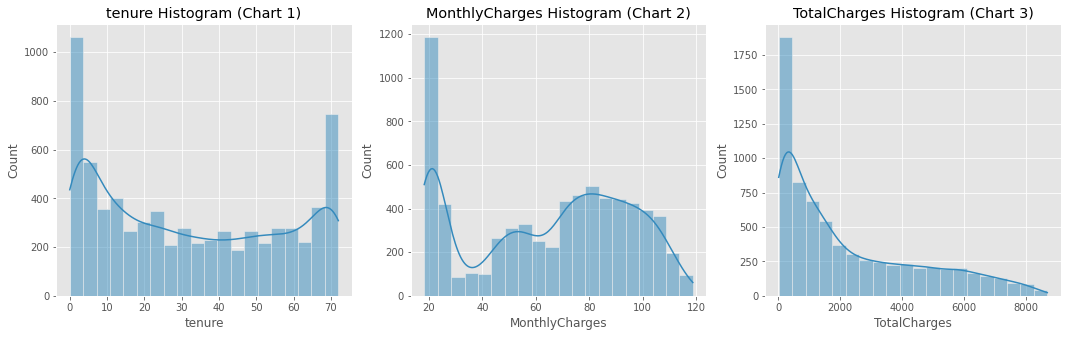

In [11]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1), sns.histplot(data['tenure'], bins=20, kde=True), plt.title('tenure Histogram (Chart 1)')
plt.subplot(1, 3, 2), sns.histplot(data['MonthlyCharges'], bins=20, kde=True), plt.title('MonthlyCharges Histogram (Chart 2)')
plt.subplot(1, 3, 3), sns.histplot(data['TotalCharges'], bins=20, kde=True), plt.title('TotalCharges Histogram (Chart 3)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

Chart 1) Sangat tidak disangka bahwa tenure (Number of months the customer has stayed with the company) para pelanggan sangat bervariasi, mulai dari 0 to 70, meskipun ada beberapa kecenderungan tenure yang lebih tinggi pada angka 0 sd 10 (pelanggan baru) kemudian di 65 sd 70 (pelanggan setia). Chart 2) Distribusi MonthlyCharges cukup unusual, terdapat jumlah yang sangat tinggi pada range 10 sd 30, besar kemungkinan bahwa pelanggan masih dalam masa trial atau uji coba services telco pada provider di dataset, dan jasa services telco gagal untuk membuat pelanggan sustain untuk terus berlangganan setelahnya (count GAP extreme decrease from 30 sd 40). Chart 3) Total charge (akumulasi) paling tinggi adalah sebesar > 8000, sedangkan untuk yang terendah adalah sebesar ~ 0 sd 1000. 

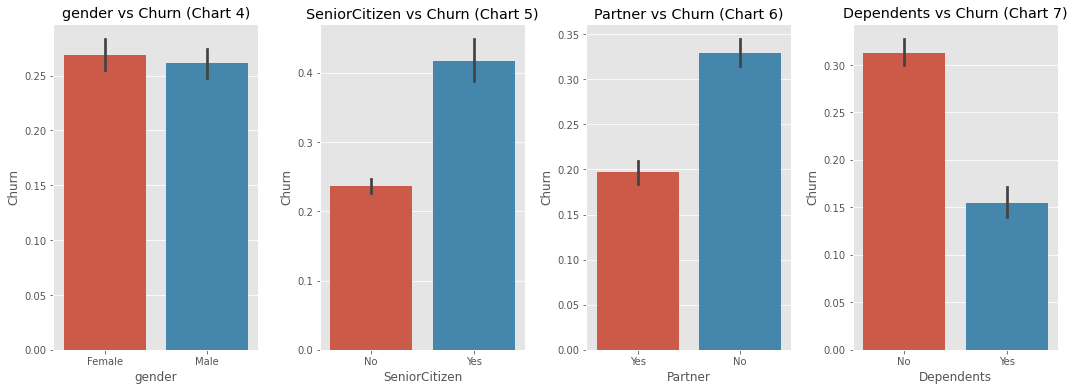

In [12]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1), sns.barplot(x='gender', y='Churn', data=data), plt.title('gender vs Churn (Chart 4)')
plt.subplot(1, 4, 2), sns.barplot(x='SeniorCitizen', y='Churn', data=data), plt.title('SeniorCitizen vs Churn (Chart 5)')
plt.subplot(1, 4, 3), sns.barplot(x='Partner', y='Churn', data=data), plt.title('Partner vs Churn (Chart 6)')
plt.subplot(1, 4, 4), sns.barplot(x='Dependents', y='Churn', data=data), plt.title('Dependents vs Churn (Chart 7)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

Terlihat bahwa baik pada Chart 4 sd 7, masing-masing feature cukup andil dalam mempengaruhi churn, namun ada juga beberapa feature yang tidak terlalu berpengaruh. Seperti pada gender, perbedaan female dan male vs Churn sangat kecil. Sedangkan untuk SeniorCitizen, partner, dan dependents, dapat terlihat bawha terdapat perbedaan data antara yes dan no pada setiap features. 

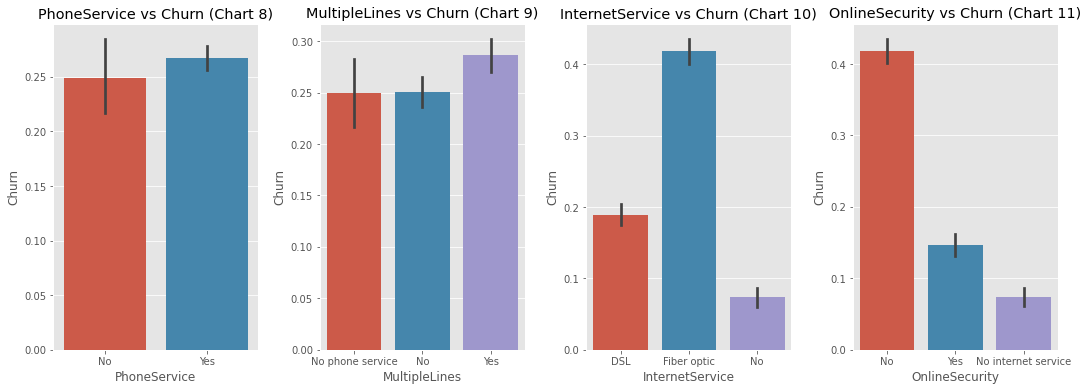

In [13]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1), sns.barplot(x='PhoneService', y='Churn', data=data), plt.title('PhoneService vs Churn (Chart 8)')
plt.subplot(1, 4, 2), sns.barplot(x='MultipleLines', y='Churn', data=data), plt.title('MultipleLines vs Churn (Chart 9)')
plt.subplot(1, 4, 3), sns.barplot(x='InternetService', y='Churn', data=data), plt.title('InternetService vs Churn (Chart 10)')
plt.subplot(1, 4, 4), sns.barplot(x='OnlineSecurity', y='Churn', data=data), plt.title('OnlineSecurity vs Churn (Chart 11)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

Pada Chart 8, PhoneService yes dan no terlihat tidak berbeda jauh vs Churn (slightly correlated). Begitu juga dengan MultipleLines pada Chart 9. Namun untuk InternetService serta OnlineSecurity, terlihat bahwa each data memiliki GAP yang cukup tinggi sehingga perlu kita pertimbangkan untuk digunakan pada saat model development. Contoh, pelanggan dengan Fiber optic cenderung memiliki Churn yang lebih tinggi dibandingkan dengan DSL dan No pada InternetService. 

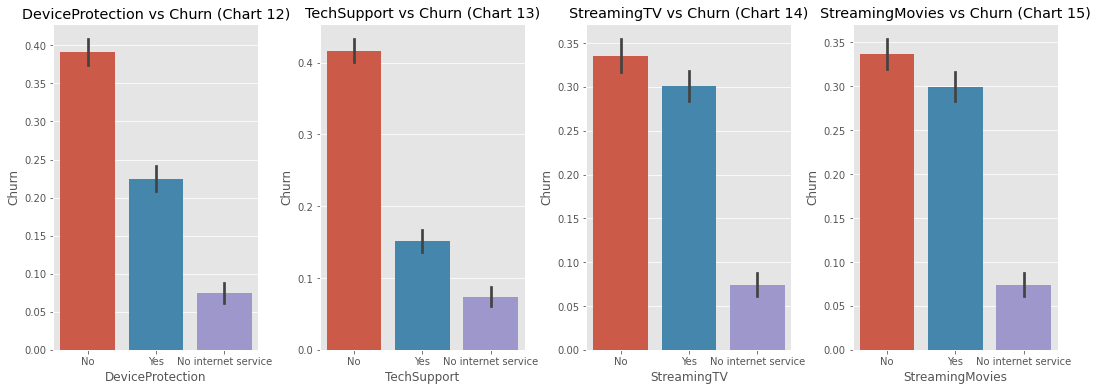

In [14]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1), sns.barplot(x='DeviceProtection', y='Churn', data=data), plt.title('DeviceProtection vs Churn (Chart 12)')
plt.subplot(1, 4, 2), sns.barplot(x='TechSupport', y='Churn', data=data), plt.title('TechSupport vs Churn (Chart 13)')
plt.subplot(1, 4, 3), sns.barplot(x='StreamingTV', y='Churn', data=data), plt.title('StreamingTV vs Churn (Chart 14)')
plt.subplot(1, 4, 4), sns.barplot(x='StreamingMovies', y='Churn', data=data), plt.title('StreamingMovies vs Churn (Chart 15)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

DeviceProtection, TechSupport, StreamingTV, serta StreamingMovies merupakan beberapa service yang diberikan jasa telco kepada para pelanggan. Terlihat bahwa pelanggan lebih cenderung untuk tetap berlangganan (Higher Churn) ketika mereka lebih memilih untuk tidak menggunakan ke 4 services yang ditawarkan oleh jasa telco.

# E. Data Preprocessing

Bagian ini berisi proses 1) membuat data train, test, inference (split data X dan y)... 2) Feature selection (merujuk pada heatmap) dll... 3) Split X dan y... 4) handling missing value... 5) hanlding outliers x_train data only...  6) Split data numerical dan categorical untuk train dan test 7) Proses Scaling dan...  8) Encoding ... 9) Concate all

## E1. Data Preparation (Train_Test, & Inference)

In [15]:
# Membuat dataset inference dari dataset master, 10 tuk define jumlah observasi inference
# Random_state untuk define formula pemilihan data secara random yet wont change
data_inf = data.sample(10, random_state=7)
# Membuat dataset train dan test (exlude inference)
data_train_test = data.drop(data_inf.index)
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

In [16]:
# Show data
data_train_test.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [17]:
# Inference dataset is ready! akan digukan untuk melihat nilai rating (scheme rating unknown)
data_inf.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9259-PACGQ,Female,No,Yes,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,62.65,2274.90,1
1,5914-DVBWJ,Female,Yes,No,No,18,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.45,1505.85,1
2,9734-YWGEX,Female,No,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),98.30,923.50,1


Oke, now we have 2 datasets, which is Train_Test & Inference (we pick 10 observation data), ***each index has been reset!***

## E2. Feature Selection

In [18]:
# Display X_train
data_train_test.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


`customerID, gender, serta PhoneService` akan kita drop karena hasil chi square violate null-hypothesis.

In [19]:
# Menggunakan columns yg digunakan saja dlm pembuatan model
data_train_test = data_train_test.drop(columns=['customerID', 'gender', 'PhoneService'])
data_train_test.head(3)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


## E3. Splitting between `X` (Features) and `y` (Target)

Data Split yang optimal dari data train dan test sebetulnya memang bergantung pada byk faktor seperti the use of case (each case of data might be approached differently), the structure of the model, dimension of the data, etc. Namun secara umum, mendefinisikan train data sebesar 80% dan test data sebesar 20% adalah permulaan pembuatan model yang baik (Pragati Baheti from Microsoft, v7labs.com).

In [20]:
# Split between X (Features) and y (Target/label/goal)
X = data_train_test.drop(label_name, axis=1) 
y = data_train_test[label_name]

# Split between Train-Set and Test-Set
# input test_size in % ... train size should be bigger than test size.
# Rekomen 80% for train is a good split to start with! (Pragati Baheti from Microsoft, v7labs.com)
x_train_full, x_test,  y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=7)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (4500, 17)
Validation data shape: (1126, 17)
Testing data shape: (1407, 17)


## E4. Handling Missing Values

### 4.1 x_train, x_val, & x_test

In [21]:
# ==============================
# Check Missing Values in `x_train`
print('x_train isnull amount : ', x_train.isnull().sum().sum())
print('x_train shape before : ', x_train.shape)
x_train = x_train.dropna()
print('x_train shape after : ', x_train.shape, '\n')
# ==============================
# Check Missing Values in `x_val`
print('x_val isnull amount : ', x_val.isnull().sum().sum())
print('x_val shape before : ', x_val.shape)
x_val = x_val.dropna()
print('x_val shape after : ', x_val.shape, '\n')
# ==============================
# Check Missing Values in `x_test`
print('x_test isnull amount : ', x_test.isnull().sum().sum())
print('x_test shape before : ', x_test.shape)
x_test = x_test.dropna()
print('x_test shape after : ', x_test.shape)

x_train isnull amount :  6
x_train shape before :  (4500, 17)
x_train shape after :  (4494, 17) 

x_val isnull amount :  3
x_val shape before :  (1126, 17)
x_val shape after :  (1123, 17) 

x_test isnull amount :  2
x_test shape before :  (1407, 17)
x_test shape after :  (1405, 17)


### 4.4 y_train, y_val, & y_test

In [22]:
# ==============================
# Check Missing Values in `y_train`
print(y_train.isnull().sum())
print(print('y_train shape before : ', y_train.shape))
# sync drop data from X into y
x_train_delta = y_train.drop(x_train.index)
y_train = y_train.drop(x_train_delta.index)
print('y_train shape after : ', y_train.shape, '\n')
# ==============================
# Check Missing Values in `y_val`
print(y_val.isnull().sum())
print(print('y_val shape before : ', y_val.shape))
# sync drop data from X into y
x_val_delta = y_val.drop(x_val.index)
y_val = y_val.drop(x_val_delta.index)
print('y_val shape after : ', y_val.shape, '\n')
# ==============================
# Check Missing Values in `y_test`
print(y_test.isnull().sum())
print(print('y_test shape before : ', y_test.shape))
# sync drop data from X into y
x_test_delta = y_test.drop(x_test.index)
y_test = y_test.drop(x_test_delta.index)
print('y_test shape after : ', y_test.shape)

0
y_train shape before :  (4500,)
None
y_train shape after :  (4494,) 

0
y_val shape before :  (1126,)
None
y_val shape after :  (1123,) 

0
y_test shape before :  (1407,)
None
y_test shape after :  (1405,)


**No Nulled Values!**

## E5. Outlier Handling

In [23]:
# Get Numerical Columns and Categorical Columns
num_columns = x_train.select_dtypes(include=np.number).columns.tolist() 
print('Numerical Columns   : ', num_columns)

Numerical Columns   :  ['tenure', 'MonthlyCharges', 'TotalCharges']


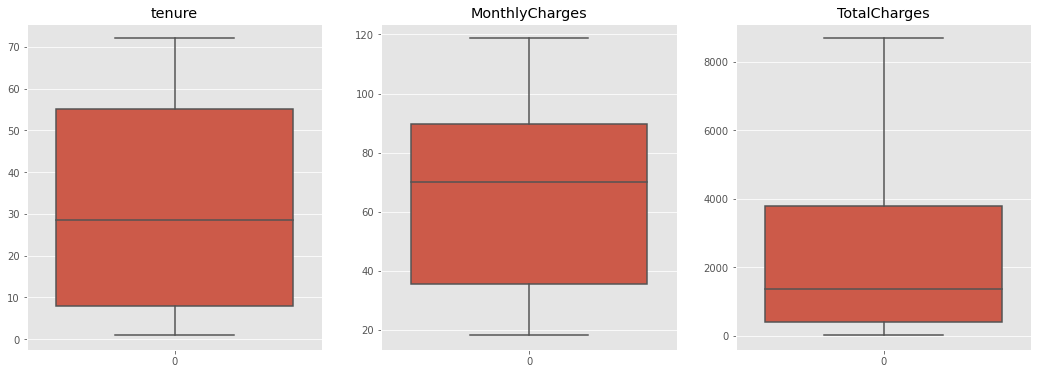

In [24]:
x_train_back = x_train.copy()
x_train_back.reset_index(drop=True, inplace=True) 

# Create chart for loop
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1), sns.boxplot(data=x_train_back['tenure']), plt.title('tenure') 
plt.subplot(1, 3, 2), sns.boxplot(data=x_train_back['MonthlyCharges']), plt.title('MonthlyCharges')
plt.subplot(1, 3, 3), sns.boxplot(data=x_train_back['TotalCharges']), plt.title('TotalCharges')

# set the spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()

**Outliers handling tidak akan kita lakukan** pada feature numerical hasil konversi dari categorial seperti `SeniorCitizen`.

In [25]:
# Define dataframe with outliers and compute the skew
x_train_numerical = x_train[num_columns]
pd.DataFrame(x_train_numerical.skew(axis=0), columns=['skewness']).sort_values(by='skewness', ascending=True).T

,MonthlyCharges,tenure,TotalCharges
skewness,-0.20497,0.250202,0.973966


In [26]:
# Create the capper | Skewness : normal
windsoriser_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['MonthlyCharges', 'tenure'])
windsoriser_normal.fit(x_train)
x_train = windsoriser_normal.transform(x_train)

# Create the capper | Skewness : skew
windsoriser_skew = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['TotalCharges'])
windsoriser_skew.fit(x_train)
x_train = windsoriser_skew.transform(x_train)

## E6. Handling imbalance data with SMOTE

In [27]:
# Identifikasi feature dengan tipe object dan float
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494 entries, 5739 to 6316
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     4494 non-null   object 
 1   Partner           4494 non-null   object 
 2   Dependents        4494 non-null   object 
 3   tenure            4494 non-null   float64
 4   MultipleLines     4494 non-null   object 
 5   InternetService   4494 non-null   object 
 6   OnlineSecurity    4494 non-null   object 
 7   OnlineBackup      4494 non-null   object 
 8   DeviceProtection  4494 non-null   object 
 9   TechSupport       4494 non-null   object 
 10  StreamingTV       4494 non-null   object 
 11  StreamingMovies   4494 non-null   object 
 12  Contract          4494 non-null   object 
 13  PaperlessBilling  4494 non-null   object 
 14  PaymentMethod     4494 non-null   object 
 15  MonthlyCharges    4494 non-null   float64
 16  TotalCharges      4494 non-null   float

In [28]:
# Define model for SMOTE-NC
smote = SMOTENC([0,1,2,4,5,6,7,8,9,10,11,12,13,14], random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

0    3279
1    3279
Name: Churn, dtype: int64

# F. Preprocessor & Pipeline

## F1. Define Column Transformer

Seperti outliers handling, skewness dari distribusi data setiap feature mempengaruhi algoritma scaling yang akan digunakan. oleh karena itu, skewness dari setiap feature perlu dihitung (after outliers has been handled).

In [29]:
# Define dataframe without outliers and compute the skew
x_train_numerical_oh = x_train[num_columns]
pd.DataFrame(x_train_numerical_oh.skew(axis=0), columns=['skewness']).sort_values(by='skewness', ascending=True).T

,MonthlyCharges,tenure,TotalCharges
skewness,-0.388984,0.50317,1.111496


In [30]:
# Show name of categorical columns
cat_columns = x_train.select_dtypes(include=['object']).columns.tolist()
print('Categorical Columns : ', cat_columns)

Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Berdasarkan masing-masing feature skewness `(after process SMOTENC, value skewness sedikit berubah)`, maka feature dengan skewness normal akan di-scaling dengan algoritma StandardScaler (contoh: MonthlyCharges dan tenure), kemudian untuk feature dengan skewness = skew, algoritma scaling yang digunakan adalah MinMaxScaler (contoh : table). Serta feature lainnya (skewness extreme), scalingnya akan menggunakan RobustScaler (contoh : carat, z dan y). Berikut di bawah ini adalah syntax untuk preprocessor-nya.

In [31]:
# Define columnn name for scaling and encoding
numeric_features_ss = ['MonthlyCharges']
numeric_features_mm = ['tenure']
numeric_features_rb = ['TotalCharges']
cat_features_OneHot = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Define scaling and encoding technique
numeric_transformer_ss = make_pipeline(StandardScaler())
numeric_transformer_mm = make_pipeline(MinMaxScaler())
numeric_transformer_rb = make_pipeline(RobustScaler())
cat_transformer_OneHot = make_pipeline(OneHotEncoder())

# Define Transformer Column
preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_ss, numeric_features_ss),
        ("num2", numeric_transformer_mm, numeric_features_mm),
        ("num3", numeric_transformer_rb, numeric_features_rb),
        ("cat1", cat_transformer_OneHot, cat_features_OneHot)
    ])

# ekstrak fitur menggunakan pipeline
x_train = preprocessor.fit_transform(x_train)
x_val = preprocessor.transform(x_val)
x_test = preprocessor.transform(x_test)

## F2. Tensorflow Pipeline

In [32]:
# process pembuatan pipeline menggunakan tensorfow
training_batches = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(70).shuffle(x_train.shape[0])
validation_batches = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(70).shuffle(x_train.shape[0])
testing_batches = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(70).shuffle(x_train.shape[0])

# G. Model Training & Evaluation

## G1. Sequential Model

### ANN model Sequential

In [33]:
# deklarasi model
model_sq = keras.models.Sequential()
model_sq.add(keras.layers.Dense(128, input_shape=(len(x_train[0]),), name = 'input'))
model_sq.add(keras.layers.Dense(64, activation='relu', name = 'hidden_2'))
model_sq.add(keras.layers.Dense(32, activation='relu', name = 'hidden_1'))
model_sq.add(keras.layers.Dense(1, activation='sigmoid', name = 'output'))

# compile, jika case multi-class, gunakan softmax untuk activation. dan categorical_crossentropy untuk loss.
model_sq.compile(loss = 'binary_crossentropy', metrics = ["acc"])

# Model Training
history_sq = model_sq.fit(training_batches, epochs=10, validation_data=(validation_batches))

Epoch 1/10
94/94 [==============================] - 2s 6ms/step - loss: 0.4963 - acc: 0.7594 - val_loss: 0.4065 - val_acc: 0.8103
Epoch 2/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4408 - acc: 0.7938 - val_loss: 0.5059 - val_acc: 0.7596
Epoch 3/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4261 - acc: 0.7998 - val_loss: 0.4149 - val_acc: 0.7970
Epoch 4/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4189 - acc: 0.8118 - val_loss: 0.4167 - val_acc: 0.8059
Epoch 5/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4199 - acc: 0.8082 - val_loss: 0.4281 - val_acc: 0.7854
Epoch 6/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4099 - acc: 0.8129 - val_loss: 0.5311 - val_acc: 0.7177
Epoch 7/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4098 - acc: 0.8138 - val_loss: 0.4896 - val_acc: 0.7471
Epoch 8/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4027 - acc: 0.81

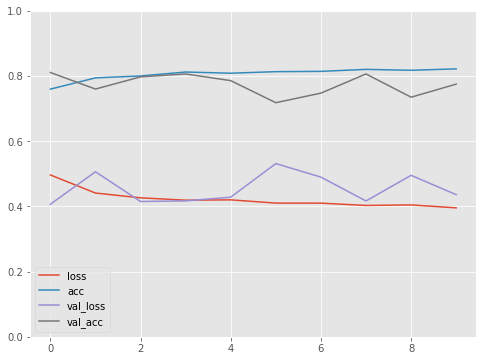

In [34]:
# Define chart of metrics
pd.DataFrame(history_sq.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### ANN model Sequential (optimizer & Improvement) epoch 40

In [35]:
# deklarasi model
model_sq = keras.models.Sequential()
model_sq.add(keras.layers.Dense(128,  input_shape=(len(x_train[0]),), name = 'input'))
model_sq.add(keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.L2(), activation='relu', name = 'hidden_1'))
model_sq.add(keras.layers.Dense(31, kernel_regularizer=tf.keras.regularizers.L2(), activation='relu', name = 'hidden_2'))
model_sq.add(keras.layers.Dense(1, activation='sigmoid', name = 'output'))

# compile, jika case multi-class, gunakan softmax untuk activation. dan categorical_crossentropy untuk loss.
model_sq.compile(loss = 'binary_crossentropy', 
                optimizer = keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["acc"])

# Define the best epoc if learning rate is used
es_callback = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Model Training
history_sq = model_sq.fit(training_batches, epochs=40, validation_data=(validation_batches), 
                            callbacks = [es_callback], verbose=1)

Epoch 1/40
94/94 [==============================] - 1s 6ms/step - loss: 1.3768 - acc: 0.7550 - val_loss: 1.0063 - val_acc: 0.7792
Epoch 2/40
94/94 [==============================] - 1s 6ms/step - loss: 0.8703 - acc: 0.7879 - val_loss: 0.7067 - val_acc: 0.7979
Epoch 3/40
94/94 [==============================] - 1s 6ms/step - loss: 0.6762 - acc: 0.7916 - val_loss: 0.7178 - val_acc: 0.7168
Epoch 4/40
94/94 [==============================] - 0s 5ms/step - loss: 0.5917 - acc: 0.7914 - val_loss: 0.6124 - val_acc: 0.7400
Epoch 5/40
94/94 [==============================] - 0s 5ms/step - loss: 0.5514 - acc: 0.7966 - val_loss: 0.6207 - val_acc: 0.7257
Epoch 6/40
94/94 [==============================] - 0s 5ms/step - loss: 0.5169 - acc: 0.7995 - val_loss: 0.5450 - val_acc: 0.7578
Epoch 7/40
94/94 [==============================] - 1s 6ms/step - loss: 0.5013 - acc: 0.7972 - val_loss: 0.5392 - val_acc: 0.7364
Epoch 8/40
94/94 [==============================] - 1s 6ms/step - loss: 0.4874 - acc: 0.79

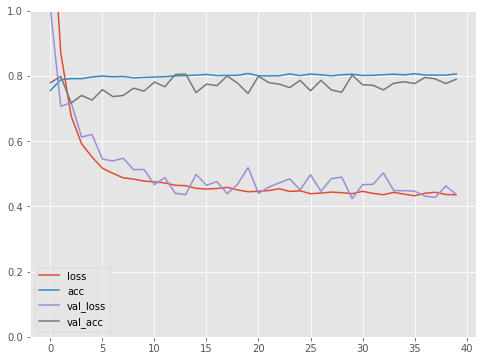

In [36]:
# Define chart of metrics
pd.DataFrame(history_sq.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## G2. Functional Model

### ANN Model Functional

In [37]:
# deklarasi model
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(64, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(1, activation="sigmoid")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

# compile, jika case multi-class, gunakan softmax untuk activation. dan categorical_crossentropy untuk loss.
model_func.compile(loss = 'binary_crossentropy', metrics = ["acc"])

# Model Training
history_func = model_func.fit(training_batches, epochs=10, validation_data=(validation_batches))

Epoch 1/10
94/94 [==============================] - 1s 9ms/step - loss: 1.8818 - acc: 0.6595 - val_loss: 1.7809 - val_acc: 0.6972
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 1.4382 - acc: 0.7121 - val_loss: 1.5363 - val_acc: 0.7053
Epoch 3/10
94/94 [==============================] - 1s 7ms/step - loss: 1.2097 - acc: 0.7296 - val_loss: 1.2224 - val_acc: 0.7311
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 1.0601 - acc: 0.7461 - val_loss: 0.9472 - val_acc: 0.7498
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.9100 - acc: 0.7630 - val_loss: 0.8482 - val_acc: 0.7542
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.7901 - acc: 0.7710 - val_loss: 0.7529 - val_acc: 0.7667
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.7271 - acc: 0.7798 - val_loss: 0.7112 - val_acc: 0.7596
Epoch 8/10
94/94 [==============================] - 1s 8ms/step - loss: 0.6472 - acc: 0.78

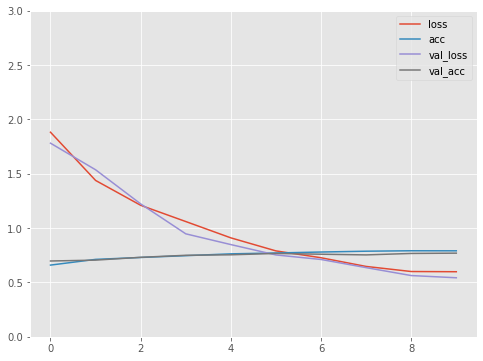

In [38]:
# Define chart of metrics
pd.DataFrame(history_func.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()

### ANN Model Functional (optimizer & Improvement) epoch 40

In [39]:
# deklarasi model
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L2(), activation="relu")(input_)
hidden2 = keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.L2(), activation="relu")(hidden1)
hidden3 = keras.layers.Dense(1, activation="sigmoid")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

# compile, jika case multi-class, gunakan softmax untuk activation. dan categorical_crossentropy untuk loss.
model_func.compile(loss = 'binary_crossentropy', 
                optimizer = keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["acc"])

# Define the best epoc if learning rate is used
es_callback = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Model Training
history_sq = model_func.fit(training_batches, epochs=40, validation_data=(validation_batches), 
                            callbacks = [es_callback], verbose=1)

Epoch 1/40
94/94 [==============================] - 1s 7ms/step - loss: 3.2410 - acc: 0.6735 - val_loss: 2.1374 - val_acc: 0.7524
Epoch 2/40
94/94 [==============================] - 1s 7ms/step - loss: 2.0959 - acc: 0.7225 - val_loss: 1.8680 - val_acc: 0.7444
Epoch 3/40
94/94 [==============================] - 1s 6ms/step - loss: 1.8835 - acc: 0.7264 - val_loss: 1.8174 - val_acc: 0.7337
Epoch 4/40
94/94 [==============================] - 1s 5ms/step - loss: 1.6566 - acc: 0.7271 - val_loss: 1.6714 - val_acc: 0.7320
Epoch 5/40
94/94 [==============================] - 0s 5ms/step - loss: 1.5258 - acc: 0.7322 - val_loss: 1.6071 - val_acc: 0.7337
Epoch 6/40
94/94 [==============================] - 1s 6ms/step - loss: 1.5552 - acc: 0.7278 - val_loss: 1.6548 - val_acc: 0.7204
Epoch 7/40
94/94 [==============================] - 1s 7ms/step - loss: 1.4789 - acc: 0.7260 - val_loss: 1.4814 - val_acc: 0.7382
Epoch 8/40
94/94 [==============================] - 1s 6ms/step - loss: 1.3750 - acc: 0.72

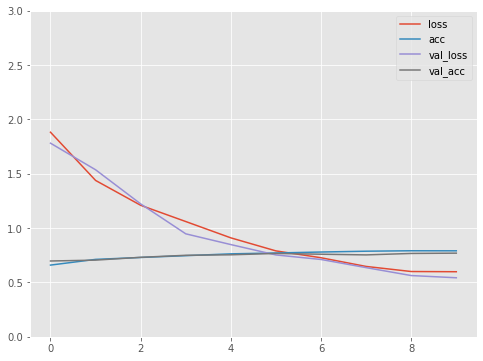

In [40]:
# Define chart of metrics
pd.DataFrame(history_func.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()

## G3. Overall Evaluation

Dari hasil performa model, overall model dengan akurasi dan loss dengan konsisten terbaik adalah **model sequential (dengan optimasi dan improvement)**... atau model_sq. </br>
Evaluasi akan dilakukan berdasarkan metrics `Confusion Metrix (classification_report)`.

In [56]:
# Predict Train and Test Label with the best model
y_pred_train = model_sq.predict(x_train).round().astype('int64')
y_pred_test = model_sq.predict(x_test).round().astype('int64')

44/44 [==============================] - 0s 721us/step


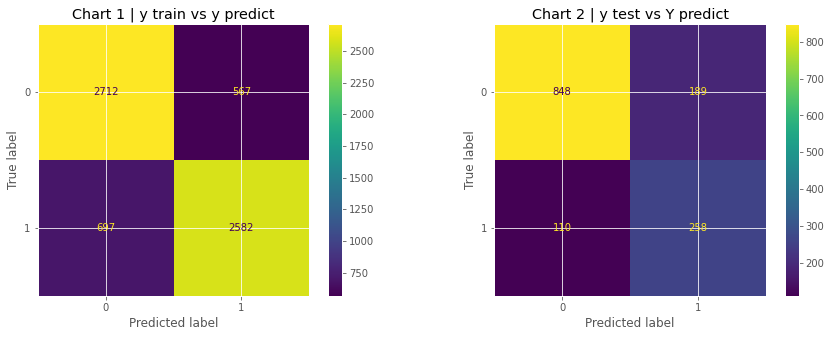

In [57]:
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0,1])
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0,1])

fig, ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=[0,1]).plot(ax=ax[0])
ax[0].set_title('Chart 1 | y train vs y predict')
ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=[0,1]).plot(ax=ax[1])
ax[1].set_title('Chart 2 | y test vs Y predict')

# set the spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

In [43]:
# classification_report  =========== Train
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      3279
           1       0.82      0.79      0.80      3279

    accuracy                           0.81      6558
   macro avg       0.81      0.81      0.81      6558
weighted avg       0.81      0.81      0.81      6558



In [44]:
# classification_report  ========== Test
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1037
           1       0.58      0.70      0.63       368

    accuracy                           0.79      1405
   macro avg       0.73      0.76      0.74      1405
weighted avg       0.80      0.79      0.79      1405



Dari hasil Confusion Metrix, 0 adalah No Churn (will not retain), sedangkan 1 adalah Yes Churn (will retain). Dilihat dari Chart 1, maka model masih keliru dalam memprediksi jumlah customer yang seharusnya No Churn (will not retain), padahal actual kenyataannya pelanggan tersebut akan retain (model perlu di-imporve dari sisi recall). Jika dilihat dari sisi bisnis, maka telco services tentu akan kehilangan peluang untuk mendapatkan customer yang retain lebih banyak karena kesalahan prediksi model.

# H. Model Saving

In [53]:
# Saving preprocess without model 
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))

# Saving model
model_sq.save("model_churn")

INFO:tensorflow:Assets written to: model_churn\assets


# I. Inferencing

## I1. Load Model

In [46]:
# Load All Files
with open('preprocessor.pkl', 'rb') as file_1:
  preprocessor = joblib.load(file_1)

## I2. Predict

In [47]:
# Feature Scaling and Feature Encoding
data_inf_preprocessor = preprocessor.transform(data_inf)

# Predict using Linear Regression 
y_pred_inf = model_sq.predict(data_inf_preprocessor)

# Create DataFrame of Rating's Prediction 
y_pred_inf_df = pd.DataFrame(y_pred_inf.round().astype(int), columns=['Predict_Churn'])

# Concate between Inference-Set and Rating's Prediction
result = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
result

1/1 [==============================] - 0s 17ms/step


,Churn,Predict_Churn
0,1,0
1,1,0
2,1,1
3,0,1
4,0,1
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


# K. Kesimpulan

**Model Analysis**

Selama experiment menggunakan beberapa model, yaitu model sequence dan functional (baik yang dengan optimizer & improvement ataupun yang tidak), maka dapat disimpulkan bahwa model sequence relatif lebih mudah dalam penulisannya secara terstruktur sehingga sistematika saat dilakukan improvement pada model (from simple to complex) menjadi lebih clear. Adapun ketika menggunakan model functional, dari sisi penulisan relatif lebih flexible (tidak perlu berurut antar hidden layer dst).

Adapun dari sisi model before dan after optimization & improvement, maka secara umum accuracy dan loss dari model menjadi lebih konsisten sehingga model cenderung menjadi lebih fit, khususnya dari sisi loss. Selisih Loss data train dan val secara umum after optimization & improvement menjadi lebih lebih kecil dan lebih konsisten. Namun dari sisi accuracy train dan val, sayangnya masih blm bisa maksimal, atau justru menjadi turun tapi secara umum selisih nilai accuracy menjadi lebih kecil which is good (hasilnya konsisten jika nilai epok yang kita set cukup besar), jika proses tuning dan optimasi model lebih baik, maka performa dari model seharusnya bisa lebih maksimal.

Dari sisi eksperimen lainnya seperti epok, kita dapat melihat bahwa semakin banyak epok, maka secara umum accurcy dan loss dari model menjadi lebih baik, dan jika ditambahkan learning rate, mode hidden layer, serta callback pada model, maka hasil dari loss dan accuracy juga menjadi lebih konsisten.

**Overall Analysis**



Model menggunakan ANN pada case ini overall bisa dikatakan underfit, meskipun result accuracy dari train, validasi, dan test-nya yang tidak jauh berbeda, namun secara menyeluruh accuracy masih di bawah 0.9. Selain itu, model after optimasi dan improvement overall menghasilkan loss dan accuracy yang lebih baik jika dibandingkan model basic (Notes: jumlah epok, callback, learning rate, regularization, dll juga sangat berpengaruh pada proses improvement model). Untuk menghasilkan model yang lebih baik, maka masih banyak beberapa hal yang harus diperbaiki, baik dari sisi eksperimen optimasi pada model, penambahan model improvement, serta melakukan adjut ulang atas treshold dari nilai presisi dan recall pada model.

***

# .... Additional Section for Deployment

In [48]:
# input user
new_data = {'SeniorCitizen': 'Yes',
            'Partner': 'Yes',
            'Dependents': 'Yes',
            'tenure': 10,
            'MultipleLines': 'Yes',
            'InternetService': 'Fiber optic',
            'OnlineSecurity': 'Yes',
            'OnlineBackup': 'Yes',
            'DeviceProtection': 'Yes',
            'TechSupport': 'Yes',
            'StreamingTV': 'Yes',
            'StreamingMovies': 'Yes',
            'Contract': 'One year',
            'PaperlessBilling': 'Yes',
            'PaymentMethod' : 'Electronic check',
            'MonthlyCharges': 30,
            'TotalCharges': 600}

# ubah menjadi dataframe
new_data = pd.DataFrame([new_data])
new_data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,Yes,Yes,10,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,30,600


In [ ]:
# preprocessing, result convert menjadi nested list
new_data = preprocessor.transform(new_data)
new_data = new_data.tolist()

In [50]:
# inference & input data
import json

input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances": new_data
})

In [54]:
# inference
# predict
import requests

URL = "http://backend-bismillah.herokuapp.com/v1/models/model_churn:predict"
r = requests.post(URL, data=input_data_json)

# berikut bentuk data hasil prediksi
res = r.json()
res

{'predictions': [[0.323468804]]}

In [55]:
# interpretasikan hasil probability
if r.status_code == 200:
  res = r.json()
  if res['predictions'][0][0] > 0.5:
    print('Yes')
  else:
    print('No')
else:
  print('Error')

No
